<h1> Exploratory data analysis (EDA) </h1>

Data is taken form **Data Science Bowl 2018** competition: https://www.kaggle.com/c/data-science-bowl-2018

**Table of content:**

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h3>Files</h3>

<h4>Filenames</h4>

Filenames are probably encoded in SHA256. It is a cryptographic one-way hash function, so there is no direct way to decode it.

<h4>Are filenames and catalog where they are named exactly the same?</h4>

In [2]:
import pandas as pd
from os import listdir
from os.path import isdir, join

train_directory = 'data/stage1_train'
test_directory = 'data/stage1_test'

def get_all_directories(directory):
    return [dirname for dirname in listdir(directory) if isdir(join(directory, dirname))]


def get_file_dir_ext(directory):
    file_dir_ext = [[d] + listdir(directory + '/' + d + '/images')[0].split('.') 
                    for d in get_all_directories(directory)]
    file_directory_ext_df = pd.DataFrame(file_dir_ext, columns=['Directory', 'Filename', 'Extension'])
    file_directory_ext_df['Same dir as filename'] = file_directory_ext_df['Directory'] == file_directory_ext_df['Filename']
    return file_directory_ext_df

train_file_dir_ext_df = get_file_dir_ext(train_directory)
test_file_dir_ext_df = get_file_dir_ext(test_directory)
display(train_file_dir_ext_df.sample(5))
display(test_file_dir_ext_df.sample(5))

,Directory,Filename,Extension,Same dir as filename
503,220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d...,220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d...,png,True
482,af576e8ec3a8d0b57eb6a311299e9e4fd2047970d3dd9d...,af576e8ec3a8d0b57eb6a311299e9e4fd2047970d3dd9d...,png,True
600,cfabf7379c5591d40aa4a20c86b4197c6a25ab55887a9f...,cfabf7379c5591d40aa4a20c86b4197c6a25ab55887a9f...,png,True
293,709e094e39629a9ca21e187f007b331074694e443db402...,709e094e39629a9ca21e187f007b331074694e443db402...,png,True
595,5908488d940e846cc121c768758da9b1bd5b9922417e20...,5908488d940e846cc121c768758da9b1bd5b9922417e20...,png,True


,Directory,Filename,Extension,Same dir as filename
31,9ab2d381f90b485a68b82bc07f94397a0373e3215ad209...,9ab2d381f90b485a68b82bc07f94397a0373e3215ad209...,png,True
21,31f1fbe85b8899258ea5bcf5f93f7ac8238660c386aeab...,31f1fbe85b8899258ea5bcf5f93f7ac8238660c386aeab...,png,True
40,d6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633f...,d6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633f...,png,True
48,e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d8...,e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d8...,png,True
64,df40099c6306ca1f47fcc8a62e2fa39486d4e223177afd...,df40099c6306ca1f47fcc8a62e2fa39486d4e223177afd...,png,True


In [3]:
import numpy as np

print('Train (Same dir as filename): ', np.unique(train_file_dir_ext_df['Same dir as filename'].values))
print('Test (Same dir as filename): ', np.unique(test_file_dir_ext_df['Same dir as filename'].values))

Train (Same dir as filename):  [ True]
Test (Same dir as filename):  [ True]


All filenames in `images` directories are named the same as directory where they are located.
<br>

As we cannot create the same directory within one directory it's impossible to have duplicated data in train and test directory separately. <br>
Data is also not duplicated between train and test datasets as we can see below:

In [4]:
get_all_directories(train_directory) == get_all_directories(test_directory)

False

<h4>Data format</h4>

In [5]:
print('Train (unique extensions): ', np.unique(train_file_dir_ext_df['Extension'].values))
print('Test (unique extensions): ', np.unique(test_file_dir_ext_df['Extension'].values))

Train (unique extensions):  ['png']
Test (unique extensions):  ['png']


All images has `png` extension.

<h3>Train and test images distribution</h3>

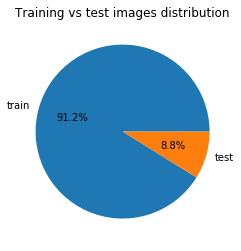

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_number_of_samples(directory):
    return len(get_all_directories(directory))

training_samples_len = get_number_of_samples(train_directory)
test_samples_len = get_number_of_samples(test_directory)

plt.pie([training_samples_len, test_samples_len], labels=['train', 'test'], autopct='%1.1f%%')
plt.title('Training vs test images distribution')
plt.show()

<h3>Dimensions</h3>

Let's see how it looks like for all training and test data.

In [7]:
import matplotlib.image as mpimg

def get_dimension_statistics(directory):
    imgs_shapes = [mpimg.imread(directory + '/' + dirname + '/images/' + dirname + '.png').shape[:-1] 
                   for dirname in listdir(directory) if isdir(join(directory, dirname))]
    return pd.DataFrame(imgs_shapes, columns = ['Width', 'Height']) 

train_dimension_statistics = get_dimension_statistics(train_directory)
test_dimension_statistics = get_dimension_statistics(test_directory)
display(train_dimension_statistics.describe())
display(test_dimension_statistics.describe())

,Width,Height
count,670.000000,670.000000
mean,333.991045,378.500000
std,149.474845,204.838693
min,256.000000,256.000000
25%,256.000000,256.000000
50%,256.000000,320.000000
75%,360.000000,360.000000
max,1040.000000,1388.000000


,Width,Height
count,65.000000,65.000000
mean,402.676923,393.184615
std,129.082956,189.813386
min,256.000000,161.000000
25%,256.000000,256.000000
50%,512.000000,256.000000
75%,519.000000,640.000000
max,524.000000,696.000000


In [8]:
def get_unique_dimensions(statistics, attribute):
    unique_dimensions = np.unique(statistics[attribute].values, return_counts=True)
    return pd.DataFrame({attribute:unique_dimensions[0],
                         'Count':unique_dimensions[1]})

<h4>Width unique values with corresponding count for train and test data</h4>

In [9]:
print('TRAIN:')
display(get_unique_dimensions(train_dimension_statistics, 'Width'))

TRAIN:


,Width,Count
0,256,446
1,260,5
2,360,91
3,512,13
4,520,92
5,603,6
6,1024,16
7,1040,1


In [10]:
print('TEST: ')
display(get_unique_dimensions(test_dimension_statistics, 'Width'))

TEST: 


,Width,Count
0,256,24
1,260,4
2,390,1
3,512,16
4,519,8
5,520,8
6,524,4


<h4>Height unique values with corresponding count for train and test data</h4>

In [11]:
print('TRAIN: ')
display(get_unique_dimensions(train_dimension_statistics, 'Height'))

TRAIN: 


,Height,Count
0,256,334
1,320,112
2,347,5
3,360,91
4,640,13
5,696,92
6,1024,16
7,1272,6
8,1388,1


In [12]:
print('TEST: ')
display(get_unique_dimensions(test_dimension_statistics, 'Height'))

TEST: 


,Height,Count
0,161,2
1,162,2
2,239,1
3,253,4
4,256,24
5,347,4
6,348,8
7,640,8
8,680,8
9,696,4


<h3>Channels visualization</h3>

In first row we can see consecutive channels of colour image, in second - black&white.

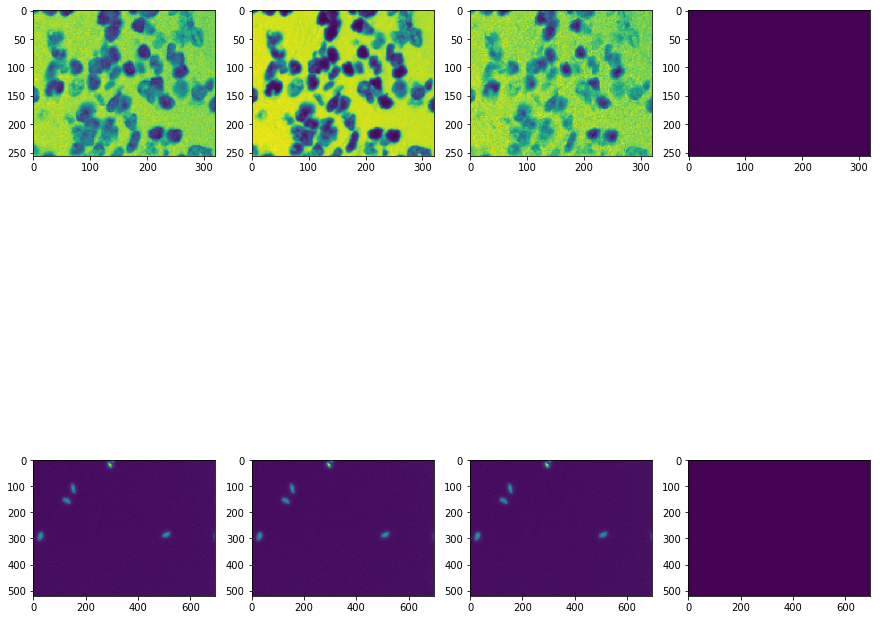

In [13]:
def visualize_channels(paths):
    f, ax = plt.subplots(len(paths), 4, figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        for channel in range(img.shape[2]):
            ax[img_number, channel].imshow(img[:,:,channel])
    plt.show()
      
    
colour_img_path = train_directory + '/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png'
bw_img_path = train_directory + '/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e/images/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png'        
visualize_channels([colour_img_path, bw_img_path])

Supposing that nothing happens in last channel. Let's take a look at it.

<h4>Empty last channel?</h4>

In [14]:
def empty_last_channel(img):
    return np.all(img[..., img.shape[-1] - 1] == 1)

def get_all_imgs_paths(directory):
    return [directory + '/' + dirname + '/images/' + dirname + '.png' 
            for dirname in listdir(directory) if isdir(join(directory, dirname))]

def imgs_have_empty_last_channel(directory):
    imgs_paths = get_all_imgs_paths(directory)
    return [empty_last_channel(mpimg.imread(img_path)) for img_path in imgs_paths]

def check_if_all_images_has_empty_last_channel(directory):
    return np.all(imgs_have_empty_last_channel(directory))


print(check_if_all_images_has_empty_last_channel(train_directory))
print(check_if_all_images_has_empty_last_channel(test_directory))

True
False


All training samples have last channel filled with same values (1). <br>
In test dataset we can found images where last channel's values are different than 1.<br>
Let's see what differentiate images in test directory. <br>
Below we can see paths to sample test images and marker (True/False) which indicate if last channel has same values.

In [15]:
imgs_paths = get_all_imgs_paths(test_directory)
have_empty_last_channel = [(img_path, empty_last_channel(mpimg.imread(img_path))) for img_path in imgs_paths]
last_channel_df = pd.DataFrame(have_empty_last_channel, columns=['Path', 'Has last channel with same values'])
last_channel_df.sample(5)

,Path,Has last channel with same values
29,data/stage1_test/0e132f71c8b4875c3c2dd7a229974...,True
57,data/stage1_test/4f949bd8d914bbfa06f40d6a0e2b5...,True
30,data/stage1_test/51c70bb8a299943b27f8b35457127...,True
0,data/stage1_test/519dc0d672d1c295fc69b629af872...,True
21,data/stage1_test/31f1fbe85b8899258ea5bcf5f93f7...,True


First idea: it can be different due to different number of channels

In [16]:
def check_channels_count(img_path):
    return mpimg.imread(img_path).shape[-1]
    
channels_count_where_False = [check_channels_count(img_attr[0]) 
                              for img_attr in have_empty_last_channel if not img_attr[1]]
channels_count_where_True = [check_channels_count(img_attr[0]) 
                             for img_attr in have_empty_last_channel if img_attr[1]]

print('Channels count where last channel has different values: ', np.unique(channels_count_where_False))
print('Channels count where last channel has same values: ', np.unique(channels_count_where_True))

Channels count where last channel has different values:  [3]
Channels count where last channel has same values:  [4]


So in test dataset there are images with 4 channels with the last one that has same values and images with 3 channels. <br>
**To sum up, last channel can be removed because it doesn't contain any important information.**

<h3>Colour model</h3>

Some images are RGB, some are black & white. <br>
Black & white would be good because we can use contrast and other image manipulation techniques to classify  white points as a nuclei. However some of spots may be something else and colour will be helpful to distuinguish them from true ones.

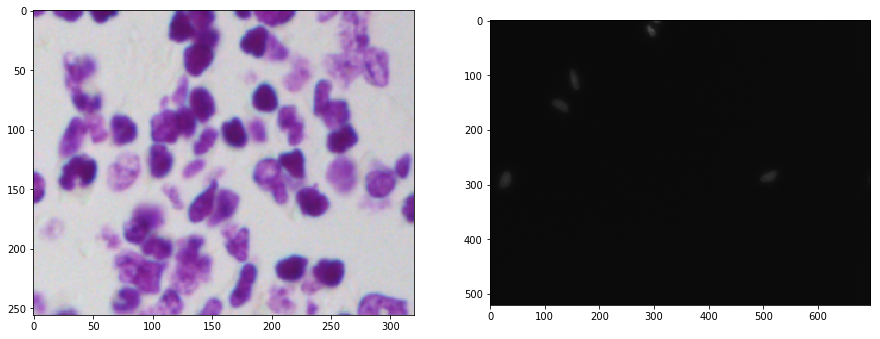

In [17]:
def show_img(paths):
    _, ax = plt.subplots(1, len(paths), figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        ax[img_number].imshow(img)
    plt.show()
    

show_img([colour_img_path, bw_img_path])

<h4>Black&white vs colour images</h4>
<br>

As we can see in `Channels visualization` section, black&white image channels (1-3) are similar. <br>
Let's see if we can differentiate black&white from colour images using channels similarity.

In [18]:
def compare_channels_train(img):
    return [np.all(img[:,:,0] == img[:,:,1]), np.all(img[:,:,1] == img[:,:,2]), np.all(img[:,:,2] == img[:,:,3])]
    

has_same_channels_train = [[img_path, *compare_channels_train(mpimg.imread(img_path))] 
                           for img_path in get_all_imgs_paths(train_directory)]

has_same_channels_train_df = pd.DataFrame(
    has_same_channels_train, 
    columns=['Path', 'Same 0th and 1st channel', 'Same 1st and 2nd channel', 'Same 2nd and 3rd channel'])

has_same_channels_train_df.head()

,Path,Same 0th and 1st channel,Same 1st and 2nd channel,Same 2nd and 3rd channel
0,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,True,True,False
1,data/stage1_train/68f833de9f8c631cedd7031b8ed9...,True,True,False
2,data/stage1_train/6c67b78e8164801059375ed9a607...,False,False,False
3,data/stage1_train/e1bcb583985325d0ef5f3ef52957...,True,True,False
4,data/stage1_train/a4c44fc5f5bf213e2be6091ccaed...,False,False,False


In [19]:
def check_equality_of_first_three_channels(df):
    return df.loc[df['Same 0th and 1st channel']].equals(df.loc[df['Same 1st and 2nd channel']])

check_equality_of_first_three_channels(has_same_channels_train_df)

True

We can observe that values in 0th, 1st and 2nd channels are the same for some images. <br>
Let's visualize some of them

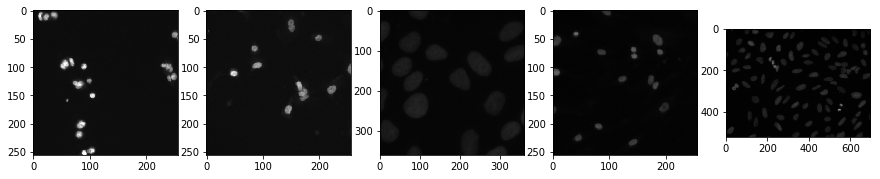

In [20]:
def visualize_images_with_same_values_in_channels(paths):
    f, ax = plt.subplots(1, 5, figsize=(15,15))
    for img_number in range(len(paths)):
        img = mpimg.imread(paths[img_number])
        ax[img_number].imshow(img)
    plt.show()
    
paths_to_sample_train_imgs_with_same_channels = has_same_channels_train_df.loc[
    has_same_channels_train_df['Same 0th and 1st channel']].sample(5)['Path'].values
visualize_images_with_same_values_in_channels(paths_to_sample_train_imgs_with_same_channels)

**Images with same values in 0th, 1st and 2nd channels are black&white.** <br>

We can check how many training images are black&white and colour.

In [21]:
def show_statistics_about_color_models(df):
    black_white_img_df = df.loc[df['Same 0th and 1st channel']]
    color_img_df = df.loc[df['Same 0th and 1st channel'] == False]

    print('Count of black&white training images: ', len(black_white_img_df))
    print('Count of colour training images: ', len(color_img_df))
    print('Black&white images in percents ', 
          len(black_white_img_df) / (len(black_white_img_df) + len(color_img_df)))

show_statistics_about_color_models(has_same_channels_train_df)

Count of black&white training images:  562
Count of colour training images:  108
Black&white images in percents  0.8388059701492537


Saving paths can be helpful in checking masks statistics for both colour models.

In [22]:
has_same_channels_train_df.loc[has_same_channels_train_df['Same 0th and 1st channel']].to_csv('data/black_white_imgs.csv', columns=['Path'], index=False)
has_same_channels_train_df.loc[has_same_channels_train_df['Same 0th and 1st channel'] == False].to_csv('data/colour_imgs.csv', columns=['Path'], index=False)

We can also provide statistics regarding to colour model for test images. <br>
As not all test images has 4 channels, dataframe will contain comparison between channels 0-2.

In [23]:
def compare_channels_test(img):
    return [np.all(img[:,:,0] == img[:,:,1]), np.all(img[:,:,1] == img[:,:,2])]

has_same_channels_test = [[img_path, *compare_channels_test(mpimg.imread(img_path))] 
                           for img_path in get_all_imgs_paths(test_directory)]

has_same_channels_test_df = pd.DataFrame(
    has_same_channels_test, 
    columns=['Path', 'Same 0th and 1st channel', 'Same 1st and 2nd channel'])

has_same_channels_test_df.head()

,Path,Same 0th and 1st channel,Same 1st and 2nd channel
0,data/stage1_test/519dc0d672d1c295fc69b629af872...,True,True
1,data/stage1_test/44afae184c89e6ba55985b4d341ac...,False,False
2,data/stage1_test/5cee644e5ffbef1ba021c7f389b33...,True,True
3,data/stage1_test/ade080c6618cbbb0a25680cf847f3...,True,True
4,data/stage1_test/17b9bf4356db24967c4677b8376ac...,False,False


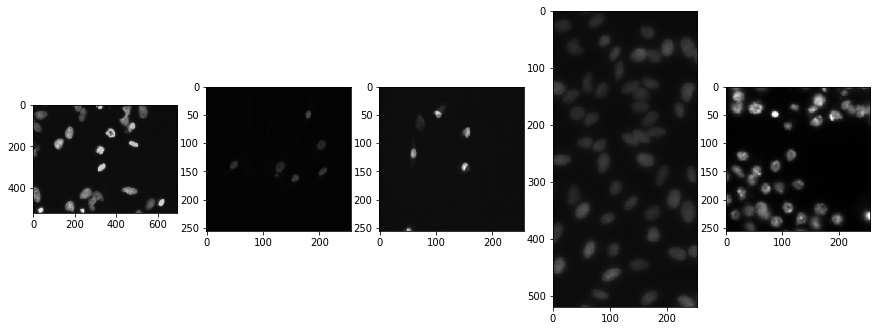

In [24]:
paths_to_sample_test_imgs_with_same_channels = has_same_channels_test_df.loc[
    has_same_channels_test_df['Same 0th and 1st channel']].sample(5)['Path'].values

visualize_images_with_same_values_in_channels(paths_to_sample_test_imgs_with_same_channels)

As we can see above, the thesis is true also for test images.

In [25]:
show_statistics_about_color_models(has_same_channels_test_df)

Count of black&white training images:  53
Count of colour training images:  12
Black&white images in percents  0.8153846153846154


<h3>Masks statistics</h3>

**Note:** These statistics can be provided only for training samples as we do not have them for test data.

In [26]:
train_directories = get_all_directories(train_directory)
dir_img_masks = [[train_directory + '/' + directory + '/images/' + directory + '.png', 
                  len(listdir(train_directory + '/' + directory + '/images')), 
                  len(listdir(train_directory + '/' + directory + '/masks'))
                 ] for directory in train_directories]

masks_df = pd.DataFrame(dir_img_masks, columns=['Path', 'Imgs count in images dir', 'Masks count'])
masks_df.describe()

,Imgs count in images dir,Masks count
count,670.0,670.000000
mean,1.0,43.971642
std,0.0,47.962530
min,1.0,1.000000
25%,1.0,15.250000
50%,1.0,27.000000
75%,1.0,54.000000
max,1.0,375.000000


All directories contain only one image. There are 670 unique images.<br>
Maximum number of mask for one image is 375, minimum is 1. It means that no one image is without mask.
<br>

<h4>Histogram of masks count</h4>

Below histogram shows number of masks distribution.

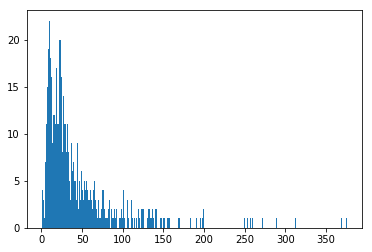

In [27]:
plt.hist(masks_df['Masks count'].values, bins=max(masks_df['Masks count'].values)) 
plt.show()

<h4>Count of nucleuses on black&white vs colour images</h4>

In [28]:
paths_to_train_black_white_imgs = has_same_channels_train_df.loc[
    has_same_channels_train_df['Same 0th and 1st channel']]['Path'].values

masks_df['Black&white'] = masks_df['Path'].apply(lambda x: x in paths_to_train_black_white_imgs)
masks_df.head()

,Path,Imgs count in images dir,Masks count,Black&white
0,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,1,16,True
1,data/stage1_train/68f833de9f8c631cedd7031b8ed9...,1,32,True
2,data/stage1_train/6c67b78e8164801059375ed9a607...,1,111,False
3,data/stage1_train/e1bcb583985325d0ef5f3ef52957...,1,6,True
4,data/stage1_train/a4c44fc5f5bf213e2be6091ccaed...,1,37,False


Let's see masks statistics for both colour models. <br>

- Black&white

In [29]:
masks_df.loc[masks_df['Black&white']].describe()

,Imgs count in images dir,Masks count
count,562.0,562.000000
mean,1.0,44.281139
std,0.0,50.606299
min,1.0,1.000000
25%,1.0,15.000000
50%,1.0,26.000000
75%,1.0,52.000000
max,1.0,375.000000


- Colour

In [30]:
masks_df.loc[masks_df['Black&white'] == False].describe()

,Imgs count in images dir,Masks count
count,108.0,108.000000
mean,1.0,42.361111
std,0.0,30.862510
min,1.0,2.000000
25%,1.0,17.000000
50%,1.0,32.500000
75%,1.0,63.250000
max,1.0,151.000000


<h4>Masks images extensions</h4>

In [31]:
masks_extensions = [listdir(train_directory + '/' + directory + '/masks')[0].split('.')[1] 
                    for directory in train_directories]
np.unique(masks_extensions)
print('Masks (unique extensions): ', np.unique(masks_extensions))

Masks (unique extensions):  ['png']


<h3>How many pixels are considered as a nucleus?</h3>

In [32]:
train_masks = [(train_directory + '/' + directory + '/masks/', 
                listdir(train_directory + '/' + directory + '/masks')
               ) for directory in train_directories]

train_masks_dirs = [main_path + mask_relative_path for main_path, mask_relative_paths in train_masks 
                    for mask_relative_path in mask_relative_paths]

In [33]:
def get_masks_pixels_statistics(paths_to_masks):
    white_pixel_value = 1
    masks_paths_with_pixels_count = []
    for path_to_mask in paths_to_masks:
        mask_img = mpimg.imread(path_to_mask)
        unique_value, count = np.unique(mask_img, return_counts=True)
        white_pixels_count = count[unique_value.tolist().index(white_pixel_value)]
        masks_paths_with_pixels_count += [[path_to_mask, 
                                           white_pixels_count,
                                           mask_img.shape[0] * mask_img.shape[1],
                                           white_pixels_count / (mask_img.shape[0] * mask_img.shape[1])
                                          ]]
    return masks_paths_with_pixels_count

In [34]:
pixels_per_mask = get_masks_pixels_statistics(train_masks_dirs)
pixels_per_mask_df = pd.DataFrame(pixels_per_mask, 
                                  columns=['Path to mask', 'Pixels count per mask',
                                           'Count of image pixels', 'Masks pixels in percents'])
pixels_per_mask_df.head()

,Path to mask,Pixels count per mask,Count of image pixels,Masks pixels in percents
0,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,657,65536,0.010025
1,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,247,65536,0.003769
2,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,645,65536,0.009842
3,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,443,65536,0.006760
4,data/stage1_train/5cc036b65f7f2d5480e2be111a56...,377,65536,0.005753


<h4>Statistics about masks for all images</h4>

In [35]:
pixels_per_mask_df[['Pixels count per mask', 'Masks pixels in percents']].describe()

,Pixels count per mask,Masks pixels in percents
count,29461.000000,29461.000000
mean,471.803707,0.003165
std,583.837040,0.004488
min,21.000000,0.000020
25%,118.000000,0.000992
50%,305.000000,0.001724
75%,574.000000,0.003376
max,11037.000000,0.083557


<h4>Statistics about masks for black&white images</h4>

In [36]:
black_white_img_directories = [img_path[0 : img_path.find('/images/') + 1] 
                               for img_path in paths_to_train_black_white_imgs]

pixels_per_mask_df['Black&white'] = pixels_per_mask_df['Path to mask'].apply(
    lambda x: True if x[0 : x.find('/masks/') + 1] in black_white_img_directories else False)

pixels_per_mask_df.loc[pixels_per_mask_df['Black&white']][
    ['Pixels count per mask', 'Masks pixels in percents']].describe()

,Pixels count per mask,Masks pixels in percents
count,24886.000000,24886.000000
mean,483.476935,0.002831
std,595.138136,0.003988
min,21.000000,0.000020
25%,114.000000,0.000906
50%,315.000000,0.001602
75%,591.000000,0.002713
max,11037.000000,0.049961


<h4>Statistics about masks for colour images</h4>

In [37]:
pixels_per_mask_df.loc[pixels_per_mask_df['Black&white'] == False][
    ['Pixels count per mask', 'Masks pixels in percents']].describe()

,Pixels count per mask,Masks pixels in percents
count,4575.000000,4575.000000
mean,408.306448,0.004984
std,513.495817,0.006268
min,21.000000,0.000256
25%,142.000000,0.001733
50%,272.000000,0.003320
75%,466.000000,0.005688
max,6845.000000,0.083557
